**Кубышкина Екатерина**


**Лабораторная 6**


**вариант 11**


задачи 6.1.11, 6.3.4, 6.7.4, 6.6.11, 6.9.11


**6.1.11**

Вычислить значение интеграла $I=\int\limits_1^{1.44} P_n(x)dx$, где $P_n(x)=\sum\limits_{i=0}^nc_ix^i$
с помощью квадратурных формул трапеций и Симпсона для элементарного
отрезка интегрирования. Оценить величину погрешности. Применяя те же
квадратурные формулы для составного отрезка интегрирования, вычислить
интеграл $I$ с точностью $0.0001$. Предварительно оценить шаг
интегрирования, при котором достигается заданная точность. 

In [1]:
import numpy as np
import sympy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def P(x):
    return 2.2+0.7*x+4.5*x**2+0.8*x**3+0.6*x**4

1.  Вычислить значение интеграла $I$ аналитически.

$I=\int\limits_1^{1.44}(2.2+0.7x+4.5x^2+0.8x^3+0.6x^4) dx = 5.605707762688 $

In [4]:
an_ans=5.605707762688

2. Вычислить значение интеграла $I$ по формулам трапеций и Симпсона, считая отрезок $[1,1.44]$ элементарным отрезком
интегрирования.

In [21]:
def trapeze_elem(f, a,b):
    return (b - a ) / 2 * (f(a) + f(b))

def trapeze(f,a,b,n):
    h = float(b - a)/n
    result = 0.5*(f(a) + f(b))
    for i in range(1, n):
        result += f(a + i*h)
    result *= h
    return result


In [22]:
def simpson_elem (f, a,b):
    return (b - a)/ 6 *(f(a) + f(b) + 4 * f((a + b) / 2))

def simpson(f, a, b, n): #n-четное
    h=float(b-a)/n
    k=0.0
    x=a + h
    for i in range(1,int(n/2) + 1):
        k += 4*f(x)
        x += 2*h

    x = a + 2*h
    for i in range(1,int(n/2)):
        k += 2*f(x)
        x += 2*h
    return (h/3)*(f(a)+f(b)+k)

In [23]:
a=1
b=1.44
trap_ans=trapeze_elem(P,a,b)
print('По формуле трапеций I = %.12f'%(trap_ans))
sim_ans=simpson_elem (P, a,b)
print('По формуле Cимпсона I = %.12f'%(sim_ans))

По формуле трапеций I = 5.787733022720
По формуле Cимпсона I = 5.605790220800


3. Найти абсолютные погрешности результатов

In [25]:
print('Абс погрешность трапеций = %.12f'%(abs(an_ans-trap_ans)))
print('Абс погрешность Cимпсона = %.12f'%(abs(an_ans-sim_ans)))

Абс погрешность трапеций = 0.182025260032
Абс погрешность Cимпсона = 0.000082458112


4. Используя выражение для остаточных членов интегрирования, оценить шаги интегрирования, при которых величина
погрешности каждой квадратурной формулы будет меньше $0.0001$.


метод трапеций:

In [27]:
def p2(x):
    return abs(9+4.8*x+7.2*x*x)

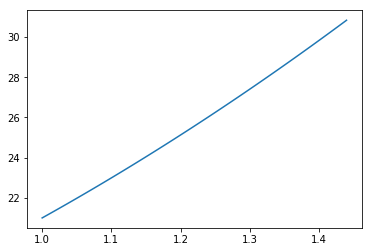

In [28]:
x = np.linspace(1,1.44,100)
import matplotlib.pyplot as plt
plt.plot(x, p2(x))

Значит, максимум в точке $1.44$, => $M_2=30.84192$

In [36]:
M2=30.84192
h_t=b-a
while M2*(b-a)*h_t**2/12 >= 0.0001:
    h_t /= 2
print('Нормальный шаг интегрирования для метода трапеций: %.6f '% (h_t))

Нормальный шаг интегрирования для метода трапеций: 0.006875 


формула Симпсона:

In [37]:
M4=14.4
h_s=b-a
while M4*(b-a)*h_s**4/2880 >= 0.0001:
    h_s /= 2
print('Нормальный шаг интегрирования для формулы Симпсона: %.6f '% (h_s))

Нормальный шаг интегрирования для формулы Симпсона: 0.440000 


5. Вычислить значения интеграла по составной квадратурной формуле с найденным шагом

In [39]:
n=int((b-a)/h_t)
trap_ans=trapeze(P,a,b,n)
print('По формуле трапеций I = %.12f'%(trap_ans))

По формуле трапеций I = 5.605752282955


In [42]:
n=int((b-a)/h_s)
print(n)

1


In [43]:
sim_ans=simpson_elem(P,a,b)
print('По формуле Cимпсона I = %.12f'%(sim_ans))

По формуле Cимпсона I = 5.605790220800


6. Найти абсолютные погрешности результатов

In [44]:
print('Абс погрешность трапеций = %.12f'%(abs(an_ans-trap_ans)))
print('Абс погрешность Cимпсона = %.12f'%(abs(an_ans-sim_ans)))

Абс погрешность трапеций = 0.000044520267
Абс погрешность Cимпсона = 0.000082458112


**6.3.4**

Вычислить значение интеграла $\int\limits_a^{b} f(x)dx$ аналитически и, используя формулу центральных прямоугольников, с шагами $h:
\frac{b-a}{2}, \frac{b-a}{3} ... \frac{b-a}{20}$. При указанных значениях $h$ найти абсолютную погрешность
и оценки теоретической абсолютной погрешности. На одном чертеже построить графики найденных погрешностей.

In [47]:
def f(x):
    return (x**2-2*x**3)*np.cos(x**2)

Аналитически: $\int\limits_{-3}^{0} (x^2-2x^3)cos(x^2)dx = 2.02933$ 

In [48]:
def rectangular(f, a, b, n):
    h = float(b - a)/n
    result = f(a+0.5*h)
    for i in range(1, n):
        result += f(a + 0.5*h + i*h)
    result *= h
    return result

In [50]:
a = -3
b = 0
an_ans = 2.02933
n_all = np.array([n for n in np.arange(2,21)])

In [56]:
def p2(x):
    return abs(2*  (14*x-5)*(x**2)*np.sin(x**2)+(4*x**5-2*x**4-6*x+1)*np.cos(x**2) )

In [57]:
x_s = np.linspace(a,b,10000)
M2 = np.max(p2(x_s))
print("M2 = ",M2)

M2 =  881.8198927875362


In [58]:
results = []
abs_pogr = []
theor_pogr = []
for n in n_all:
    res = rectangular(f,a,b,n)
    results.append(res)
    abs_pogr.append(abs(an_ans - res))
    theor_pogr.append(M2*(b-a)*((b-a)/n)**2/24)

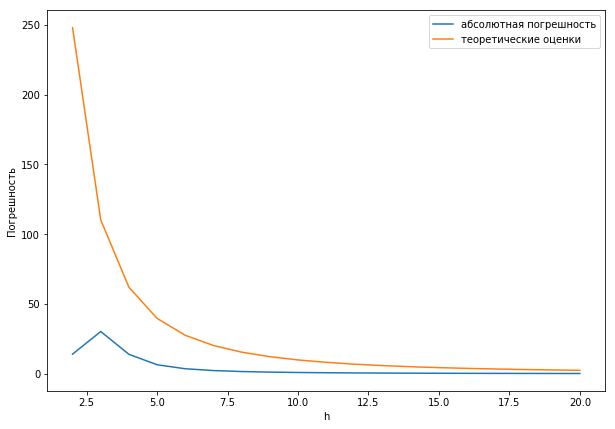

In [61]:
plt.figure(figsize = (10,7))
plt.plot(n_all,abs_pogr,label='абсолютная погрешность')
plt.plot(n_all,theor_pogr,label='теоретические оценки')
plt.xlabel('n')
plt.ylabel('Погрешность')
plt.legend()

**6.7.4**

Вычислить приближенно площадь фигуры, ограниченной кривыми, указанными в индивидуальном варианте. Точки пересечения
кривых найти графически. Для вычисления интегралов с точностью $10^{-8}$ использовать квадратурную формулу, указанную в индивидуальном
варианте, и правило Рунге оценки погрешности

In [62]:
def f1(x):
    return 27/(x**2+9)
def f2(x):
    return x**2/6

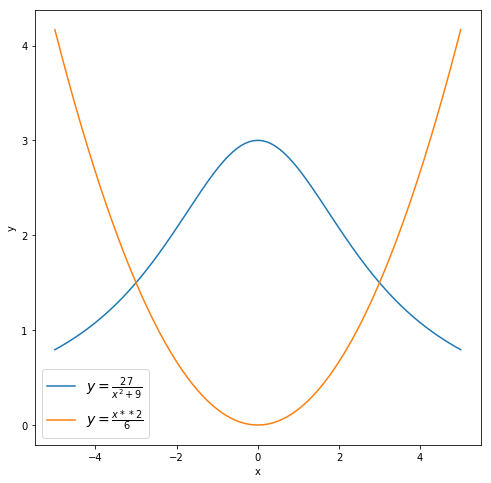

In [65]:
x_all = np.linspace(-5,5,500)
plt.figure(figsize = (8,8))
plt.plot(x_all,f1(x_all),label='$y=\\frac{27}{x^2+9}$')
plt.plot(x_all,f2(x_all),label='$y=\\frac{x**2}{6}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=14)

Точки пересечения: $x_1=-3, x_2=3$

In [69]:
n = 10
S_old = 0
eps=1e-8
S1 = rectangular(f1,a,b,n)
S2 = rectangular(f2,a,b,n)
S_new = abs(S1-S2)
while abs(S_old-S_new)>=eps:
    S_old = S_new
    n = 2*n
    S1 = rectangular(f1,a,b,n)
    S2 = rectangular(f2,a,b,n)
    S_new = abs(I1-I2)
print(S_new)

5.568583471918165


**6.6.11**

Вычислить значение интеграла $I$ из задачи 6.1, используя квадратурную формулу Гаусса с одним, двумя, тремя, четырьмя узлами.
Определить абсолютную погрешность результата. Построить гистограмму зависимости погрешности от числа узлов.

In [70]:
def P(x):
    return 2.2+0.7*x+4.5*x**2+0.8*x**3+0.6*x**4

In [71]:
an_ans=5.605707762688
a = 1
b = 1.44

In [73]:
def Gauss(f,a,b,n):
    if n==1:
        x=np.array([0])
        w=np.array([2])
    elif n==2:
        x=np.array([-0.577350269189626,0.577350269189626])
        w=np.array([1,1])
    elif n==3:
        x=np.array([-0.77459666929954,0,0.77459666929954])
        w=np.array([0.55555555555556,0.88888888888888,0.55555555555556])
    elif n==4:
        x=np.array([-0.861136311594052,-0.339981043584856,0.339981043584856,0.861136311594052])
        w=np.array([0.347854845137454,0.652145154862546,0.652145154862546,0.347854845137454])
        
    return ((b-a)/2)*np.sum(w*f((a+b)/2+x*(b-a)/2))

In [76]:
all_n = np.arange(1,5)
pogr = []
for n in all_n:
    I = Gauss(P,a,b,n)
    print(" %.d узлов: %.6f " %(n,I))
    pogr.append(abs(an_ans - I))

 1 узлов: 5.514819 
 2 узлов: 5.605653 
 3 узлов: 5.605708 
 4 узлов: 5.605708 


Text(0, 0.5, 'pogr')

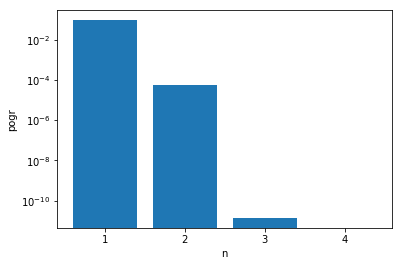

In [78]:
plt.bar(all_n,pogr,tick_label = ['1','2','3','4'])
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('pogr')